In [128]:
import cv2
import numpy as np
import seaborn as sns

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report

In [4]:
train_dir = 'Brain_Tumor_Data_Set/Train'
test_dir = 'Brain_Tumor_Data_Set/Test'

In [33]:
datagenerator = ImageDataGenerator(rescale=1./255.)

train_generator = datagenerator.flow_from_directory(train_dir,
                                                   target_size = (200, 200),
                                                   color_mode = 'grayscale',
                                                   class_mode = 'binary',
                                                   shuffle = True)

test_generator = datagenerator.flow_from_directory(test_dir,
                                                   target_size = (200, 200),
                                                   color_mode = 'grayscale',
                                                   class_mode = 'binary',
                                                   shuffle = True)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [150]:
model = Sequential()

model.add(Conv2D(32, (3,3), strides=(2,2), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), strides=(2,2), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 99, 99, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                73744     
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [151]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [152]:
history = model.fit(train_generator, batch_size=258, epochs=10, validation_data=test_generator)

Epoch 1/10
94/94 [==============================] - 48s 516ms/step - loss: 0.6887 - accuracy: 0.5443 - val_loss: 0.6844 - val_accuracy: 0.5610
Epoch 2/10
94/94 [==============================] - 48s 516ms/step - loss: 0.6778 - accuracy: 0.6090 - val_loss: 0.6674 - val_accuracy: 0.6780
Epoch 3/10
94/94 [==============================] - 57s 610ms/step - loss: 0.6622 - accuracy: 0.6477 - val_loss: 0.6491 - val_accuracy: 0.6860
Epoch 4/10
94/94 [==============================] - 56s 598ms/step - loss: 0.6428 - accuracy: 0.6803 - val_loss: 0.6252 - val_accuracy: 0.7280
Epoch 5/10
94/94 [==============================] - 52s 557ms/step - loss: 0.6113 - accuracy: 0.7137 - val_loss: 0.6129 - val_accuracy: 0.6930
Epoch 6/10
94/94 [==============================] - 62s 654ms/step - loss: 0.5789 - accuracy: 0.7360 - val_loss: 0.5819 - val_accuracy: 0.7280
Epoch 7/10
94/94 [==============================] - 75s 799ms/step - loss: 0.5459 - accuracy: 0.7407 - val_loss: 0.6085 - val_accuracy: 0.6760

In [153]:
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

Loss:  0.5630670785903931
Accuracy:  0.7210000157356262


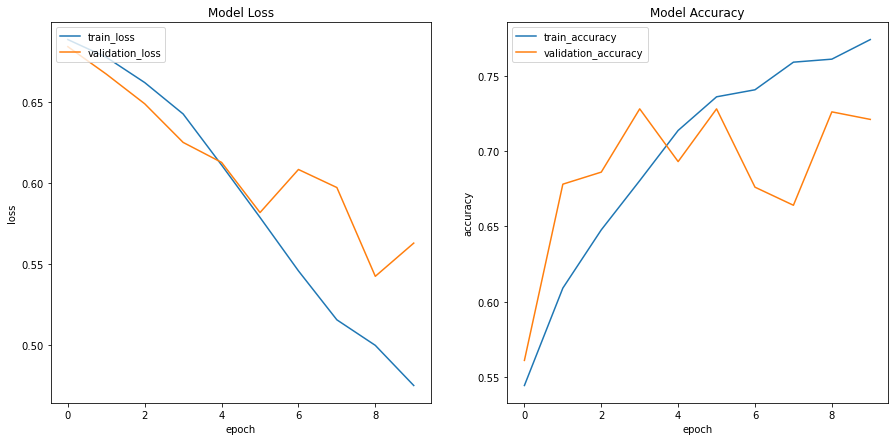

In [154]:
plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'validation_accuracy'], loc='upper left')

plt.show()

In [155]:
y_pred = model.predict(test_generator)
y_pred = y_pred > 0.5

In [156]:
print(classification_report(test_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.41      0.45       500
           1       0.50      0.58      0.53       500

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000



Not Cancer :0.98


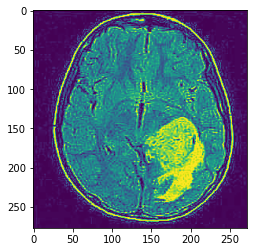

In [158]:
img = cv2.imread('Brain_Tumor_Data_Set/Test/not_cancer/Not Cancer  (1499).jpg', 0)
resize_img = cv2.resize(img, (200, 200))
array_img = image.img_to_array(resize_img)
norm_img = array_img/255

expand_img = np.expand_dims(norm_img, axis=0)
prediction = model.predict(expand_img)

if(prediction[:,:]>0.5):
    print('Not Cancer :%1.2f'%(prediction[0,0]))
else:
    print('Cancer :%1.2f'%(1.0-prediction[0,0]))

plt.imshow(img1)
plt.show()